## Based On Account

In [7]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'f4O4YC6tmiVySTwwOwggfCBnO'
CONSUMER_SECRET = 'Jsv7vrT5Ba49GEKLGTDx1wgk0T5kK9mbNa8ZbBR7tU4EXfm3QB'

# Access:
ACCESS_TOKEN  = '3271788373-mdrcW5A1KZld5VCKaZsHJuSjnXwJr3f7S1wPsH4'
ACCESS_SECRET = 'zxO3YcLpME07GunU3H7wFTeGTjDmd5bexQn2P53JXfaJP'

In [9]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [10]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="pilkada", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:100]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Google Alerts RSS delivery is temporarily not available. If you would like to continue receiving Google Alerts ...

BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http://t.co/FrGXDNQvEK http://t.co/NnWwpIeqZa

Google Reader is no longer available. To continue receiving Google Alerts, go to http://t.co/8pnJPmEA3a...

Hitung Cepat Pilkada Kota Bandung, Calon PKS-Gerindra Unggul. Pasangan Ridwan ...www.youtube.com/watch?v=wHWCCz8KeyI http://t.co/fGL7EfZTbm

Powerful Presentations Herman - Daud http://t.co/GVSvFvdln4 http://t.co/fbfuSmC1gd

1:58. Watch Later Demo Pilkada Lumajangby MbahAsong No views · 1:38. Watch ...www.youtube.com/watch?v=v5MEsOFZeIk http://t.co/guQZw5KRs6

Pilkada Sumsel, TPS Tak Kesulitan Prosedur 2 http://t.co/1CLWQ7vRYn http://t.co/3qDxdmExzf

Listen to JINGLE PILKADA BANDUNG - FAHMY ARSYAD SAID by pamanami: Pembuatan : April 2013 Composer &amp; Arranger :... http://t.co/HwNPs0kwQS

KPUD Nyatakan Pasangan Pastika-Sudikerta

In [11]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(5))

,Tweets
0,Google Alerts RSS delivery is temporarily not ...
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...
2,Google Reader is no longer available. To conti...
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G..."
4,Powerful Presentations Herman - Daud http://t....


In [12]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [13]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

354651833278537729
2013-07-09 17:22:40
twitterfeed
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [14]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [15]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Google Alerts RSS delivery is temporarily not ...,114,354651833278537729,2013-07-09 17:22:40,twitterfeed,0,0
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...,85,352729623743823873,2013-07-04 10:04:30,twitterfeed,0,0
2,Google Reader is no longer available. To conti...,106,351987859349184512,2013-07-02 08:56:59,twitterfeed,0,0
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G...",139,349249958836314113,2013-06-24 19:37:33,twitterfeed,0,0
4,Powerful Presentations Herman - Daud http://t....,82,345450986954960896,2013-06-14 08:01:48,twitterfeed,0,0
5,1:58. Watch Later Demo Pilkada Lumajangby Mbah...,136,344752370695151616,2013-06-12 09:45:45,twitterfeed,0,0
6,"Pilkada Sumsel, TPS Tak Kesulitan Prosedur 2 h...",90,343710424698597376,2013-06-09 12:45:25,twitterfeed,0,0
7,Listen to JINGLE PILKADA BANDUNG - FAHMY ARSYA...,140,341248233047212032,2013-06-02 17:41:33,twitterfeed,0,0
8,KPUD Nyatakan Pasangan Pastika-Sudikerta Menan...,119,340908267943374848,2013-06-01 19:10:39,twitterfeed,0,0
9,Rencananya Pilkada Gubernur Jateng ini akan di...,136,339884388428947456,2013-05-29 23:22:07,twitterfeed,0,0


In [16]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 132.385


In [17]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Discover the latest info about tamil amma magan incest stories in tamil.html and read our other article related ... http://t.co/PBopvf5R
Number of likes: 2
136 characters.

The tweet with more retweets is: 
Google Alerts RSS delivery is temporarily not available. If you would like to continue receiving Google Alerts ...
Number of retweets: 0
114 characters.



In [18]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

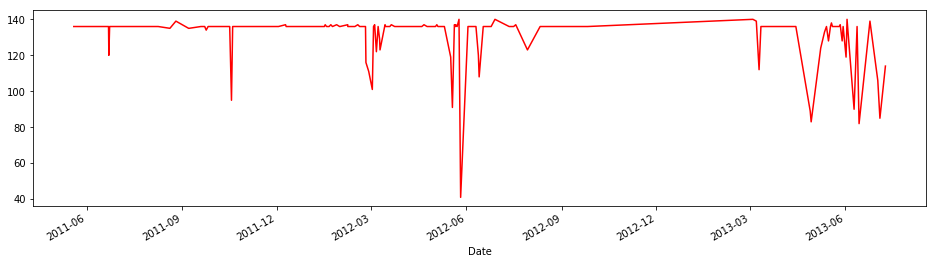

In [19]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

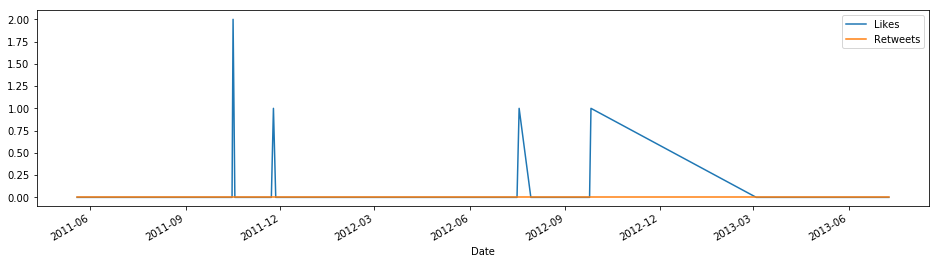

In [20]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [21]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* twitterfeed


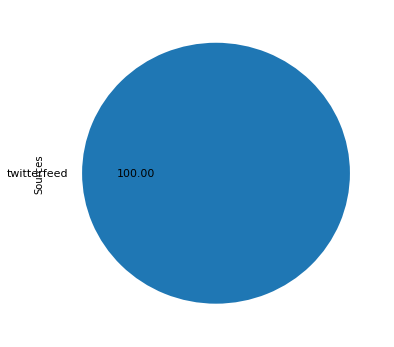

In [22]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [23]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Google Alerts RSS delivery is temporarily not ...,114,354651833278537729,2013-07-09 17:22:40,twitterfeed,0,0,-1
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...,85,352729623743823873,2013-07-04 10:04:30,twitterfeed,0,0,0
2,Google Reader is no longer available. To conti...,106,351987859349184512,2013-07-02 08:56:59,twitterfeed,0,0,1
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G...",139,349249958836314113,2013-06-24 19:37:33,twitterfeed,0,0,0
4,Powerful Presentations Herman - Daud http://t....,82,345450986954960896,2013-06-14 08:01:48,twitterfeed,0,0,1
5,1:58. Watch Later Demo Pilkada Lumajangby Mbah...,136,344752370695151616,2013-06-12 09:45:45,twitterfeed,0,0,0
6,"Pilkada Sumsel, TPS Tak Kesulitan Prosedur 2 h...",90,343710424698597376,2013-06-09 12:45:25,twitterfeed,0,0,0
7,Listen to JINGLE PILKADA BANDUNG - FAHMY ARSYA...,140,341248233047212032,2013-06-02 17:41:33,twitterfeed,0,0,0
8,KPUD Nyatakan Pasangan Pastika-Sudikerta Menan...,119,340908267943374848,2013-06-01 19:10:39,twitterfeed,0,0,0
9,Rencananya Pilkada Gubernur Jateng ini akan di...,136,339884388428947456,2013-05-29 23:22:07,twitterfeed,0,0,0


In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [26]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 35.0%
Percentage of neutral tweets: 63.0%
Percentage de negative tweets: 2.0%


## Based On Random 